# Колесников Никита Олегович РК6-63Б

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize

In [15]:
class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

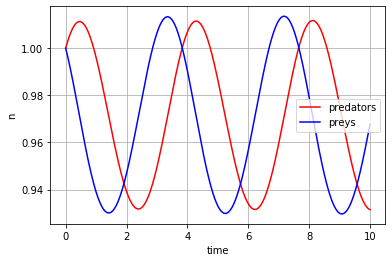

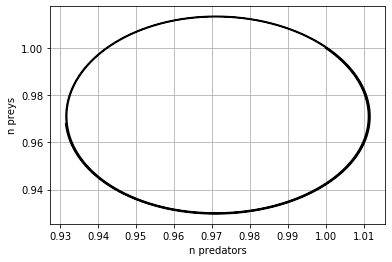

In [13]:
def dif(par):
    maxd = 0
    maxprey = 0
    maxpred = 0
    biome = Biome(tmax = 10)
    biome.run(par[0], par[1], par[2], par[3])
    for i in range(0, biome._n_iters):
        def mxd():
            return  math.fabs(biome.prey[i] - biome.pred[i])
        if mxd() > maxd:
            maxd = mxd()
        if maxprey < biome.prey[i]:
            maxprey = biome.prey[i]
        if maxpred < biome.pred[i]:
            maxpred = biome.pred[i]
    if maxd == 0:
        maxd = 10000
    del biome
    return maxd / ((maxprey + maxpred) / 2)

sln = minimize(dif,[2, 1, 2, 1])
biome = Biome(tmax = 10)
biome.run(sln.x[0], sln.x[1], sln.x[2], sln.x[3])
biome.plot()
biome.plot_cycle()